# single qubit simulation using Qutip
Pantea Farhadi
Serl Lab

The main purpose of this part is to simulate the anharmonicity of transmon qubit compared to normal quantum harmonic oscilator,
the anharmonicity of transmon qubit is the due to non linear behaviour of Josephson junction and it apears in higher order 
terms of expansion of hamiltonian, here is the hamiltonian:
    

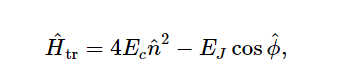


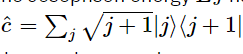

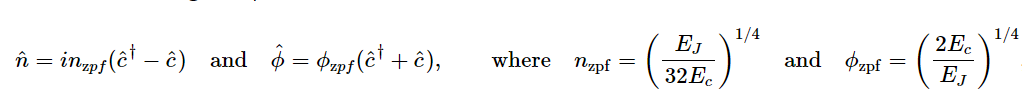

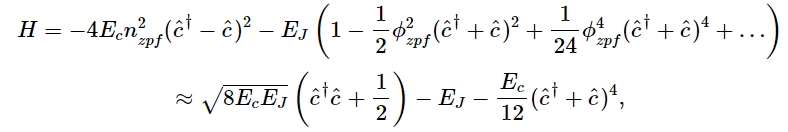

Defining $\omega _{0} \ =\ \sqrt{8E_{c} Ej}$ and $\delta \ =\ E_{c}$:


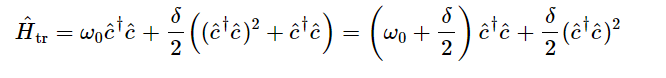

and finally by defining $\omega \ =\ \omega _{0} \ +\ \delta $:


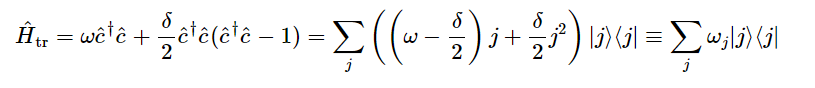

There are two main functions in the code one for calculating the hamiltonian of transmon and the other for QHO

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Phase $\\phi$', ylabel='Energy Levels / $\\hbar\\omega$'>)

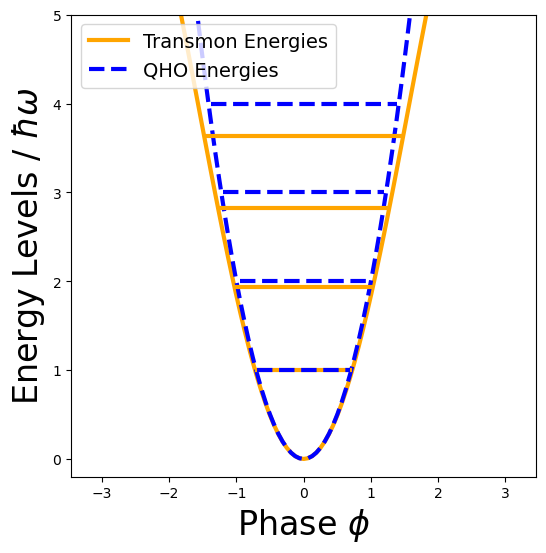

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def hamiltonian_Tr(Ej, w, anharm, N, N_energies):
    c = destroy(N)
    H_transmon = w*c.dag()*c + (anharm/2)*(c.dag()*c)*(c.dag()*c - 1)
    E_transmon = H_transmon.eigenenergies()[0:2*N_energies]
    return E_transmon

def hamiltonian_QHO(Ej, w, N, N_energies):
    c = destroy(N)
    H_QHO = w*c.dag()*c
    E_QHO = H_QHO.eigenenergies()[0:N_energies]
    return E_QHO

def plotting (U_Tr, U_QHO, E_Tr, E_QHO, N_energies, N_phis, phis):
    fig, axes = plt.subplots(1, 1, figsize=(6,6))

    axes.plot(phis, U_transmon, '-', color='orange', linewidth=3.0)
    axes.plot(phis, U_QHO, '--', color='blue', linewidth=3.0)

    for eidx in range(1,N_energies):
        delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
        delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
        QHO_lim_idx = min(np.where(U_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
        trans_lim_idx = min(np.where(U_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
        trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                                 [delta_E_transmon, delta_E_transmon], '-', color='orange', linewidth=3.0)
        qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                               [delta_E_QHO, delta_E_QHO], '--', color='blue', linewidth=3.0)

    axes.set_xlabel('Phase $\phi$', fontsize=24)
    axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=24)
    axes.set_ylim(-0.2,5)

    qho_label.set_label('QHO Energies')
    trans_label.set_label('Transmon Energies')
    axes.legend(loc=2, fontsize=14)
    return fig, axes

N = 35
N_energies = 5
N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)
Ej = 20e9
w = 5e9
anharm = -300e6 # in terms of MHz


# potential energies of transmon and QHO
U_transmon = (E_J-E_J*np.cos(phis)) / w
U_QHO = 0.5*E_J*phis**2/w
E_transmon = hamiltonian_Tr(Ej, w, anharm, N, N_energies)
E_QHO = hamiltonian_QHO(Ej, w, N, N_energies)
plotting(U_transmon, U_QHO, E_transmon, E_QHO, N_energies, N_phis, phis)

In the second part, hamiltonian of transmon is plotted for different states against $n_{g}$ for different ratios of $E_{J}/E_{C}$ as this rate increases the effect of $n_{g}$ decreases which makes the transmon qubit less sensitive to charge niose but also the anharmonicity of qubit decreases(why?). Here is the hamiltonian:


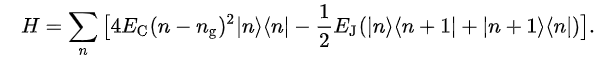

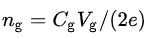

In [57]:
# function
def hamiltonian(Ec, Ej, N, ng):
    h = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                         np.diag(-np.ones(2*N), -1))
    return Qobj(h)

def plotting(ng, energies, ymax=(20, 3)):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    for i in range(len(energies[0, :])):
        axes[0].plot(ng, energies[:, i])
    axes[0].set_ylim(-2, ymax[0])
    axes[0].set_title("$E_{J}/E_{C} = 1$")
    axes[0].set_xlabel(r'$n_{g}$', fontsize=18)
    axes[0].set_ylabel(r'$E_{n}$', fontsize=18)
    for i in range(len(energies[0, :])):
        axes[1].plot(ng_vec, (energies[:,i]-energies[:,0])/(energies[:,1]-energies[:,0]))
    axes[1].set_ylim(-0.1, ymax[1])
    axes[1].set_xlabel(r'$n_{g}$', fontsize=18)
    axes[1].set_ylabel(r'$E_{n0}/E_{10}}$', fontsize=18)
    return fig, axes

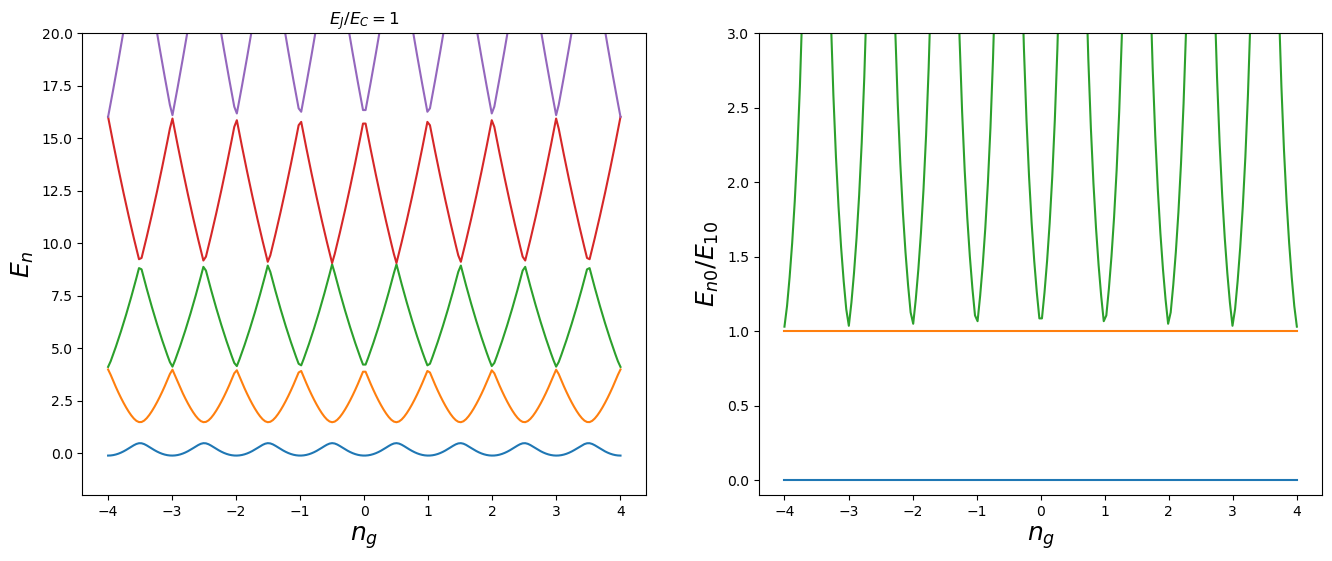

In [58]:
N = 10
Ec = 1.0
Ej = 1.0
ng_vec = np.linspace(-4, 4, 200)

energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])
plotting(ng_vec, energies);

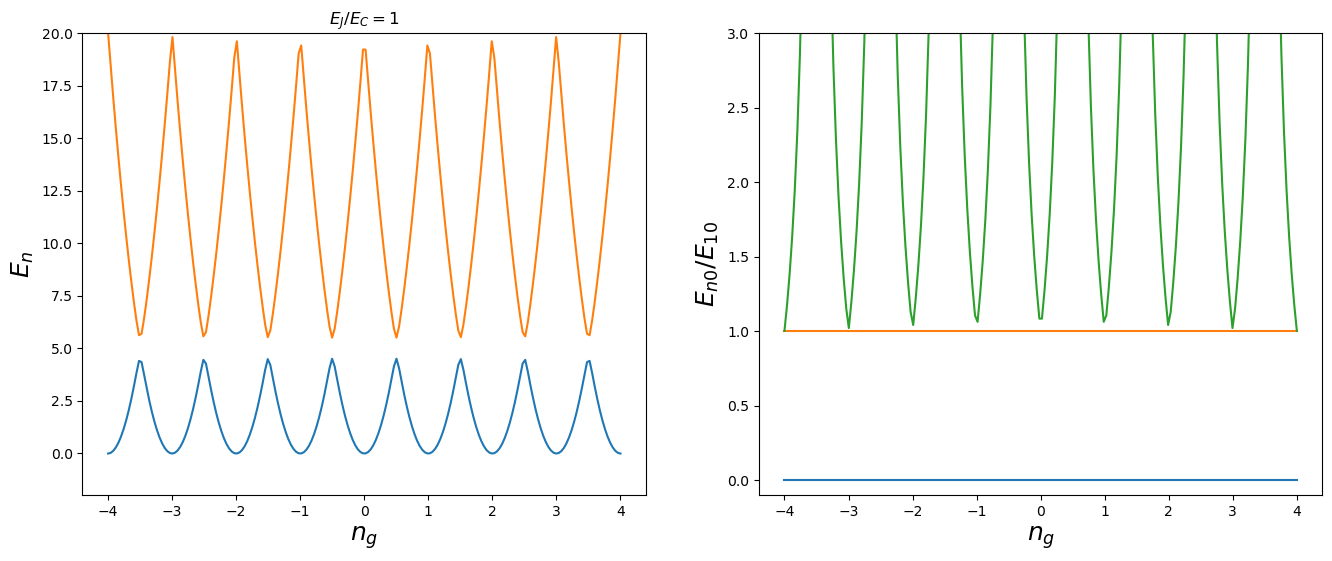

In [59]:
N = 10
Ec = 5.0
Ej = 1.0
ng_vec = np.linspace(-4, 4, 200)

energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])
plotting(ng_vec, energies);